# Tutorial: simulating sensitivities with `grbsens` 
Goals of the project:

1. Create a package purely in python 3 that can run either in a notebook or from the command line
2. Add the option of parallelization


[Click here for Github repository](https://github.com/astrojarred/grbsens)


# Imports and settings

## Import standard python packages

In [22]:
import os
import sys
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## import ctools and gammalib

In [2]:
import gammalib
import ctools
import cscripts

## import grbsens package

In [3]:
sys.path.insert(0, '/astri01/data1/gershon/ctools_patricelli/')

import grbsens.grb

## Set additional settings

In [28]:
# display all pandas columns
pd.set_option("display.max_columns", None)

# set seaborn to be the plotter
sns.set()

# automatically reload grbsens from source
%load_ext autoreload
%autoreload 1
%aimport grbsens.grb
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
grbsens.grb

Modules to skip:



## Add `ctools` info to paths

In [5]:
os.environ["CTOOLS"] = "/astri01/data1/gershon/anaconda3/envs/ctools"
os.environ["GAMMALIB"] = "/astri01/data1/gershon/anaconda3/envs/ctools"
os.environ["CALDB"] = "/astri01/data1/gershon/anaconda3/envs/ctools/share/caldb"

# Calculating sensitivity with equally-spaced time bins

## Specify filepath to input model and output directory

In [6]:
output_directory="/astri01/data1/gershon/ctools_patricelli/notebooks"
input_model_path= "/astri01/data1/gershon/ctools_patricelli/notebooks/grb.xml"

## Initialize a `grbsens.grb.grb` class

- The only required option is `input_model` which ios the path to the input model `.xml` file
- The defaults settings are:

```python
    total_time=1.0
    delta_t=1.0
    emin=0.03
    emax=10
    bins=1
    irf='North_0.5h'
    init_time=1.0
    sigma=5.0
    offset=0.0
    binsz=0.2
    sens_type='Integral'
    rad=2.25
    caldb='prod2'
    src_name='GRB'
    
```
- Now we will run an example of equally spaced time bins of 1s from 0-4 seconds

In [24]:
my_grb = grbsens.grb.grb(input_model=input_model_path, init_time=0, total_time=4, delta_t=1)

Running from t0=0s to t1=4s for a total duration of t=4 with time steps of dt=1s each


## Execute the simulations
- Options include:

```python
    write_to_file=True     # writes output to a csv
    output_filepath=None   # full filepath and filename (including .csv) of output csv
    cwd=None               # current working directory (where to store cssens outputs and logs)
    load_results=False     # see comments below?
```
- `load_results` skips the simulation altogether and simply loads the outputs of a previous simulation. This is useful for:
    - loading in previously-calculated results in order to make plots or manipulate the data in any other way
    - demonstration purposes when you want to explain the feautres of the package without waiting for `cssens` to run

In [25]:
my_grb.execute(write_to_file=False, cwd=output_directory, load_results=True)

Running `cssens` job #0 for GRB for a duration of 1.0s
Done with duration=1s

Running `cssens` job #1 for GRB for a duration of 2.0s
Done with duration=2s

Running `cssens` job #2 for GRB for a duration of 3.0s
Done with duration=3s

Running `cssens` job #3 for GRB for a duration of 4.0s
Done with duration=4s



## view output in pandas format with `grb.output()`

In [26]:
my_grb.output

,loge,emin,emax,crab_flux,photon_flux,energy_flux,sensitivity,regcoeff,nevents,npred,duration,output_file,log_file
job_number,,,,,,,,,,,,,
0,-0.261439,0.03,10.0,2.084710,7.272769e-09,1.697115e-09,2.880777e-10,0.995410,23.0,22.979056,1.0,/astri01/data1/gershon/ctools_patricelli/noteb...,/astri01/data1/gershon/ctools_patricelli/noteb...
1,-0.261439,0.03,10.0,0.899085,3.136569e-09,7.319243e-10,1.242409e-10,0.977380,30.0,29.998423,2.0,/astri01/data1/gershon/ctools_patricelli/noteb...,/astri01/data1/gershon/ctools_patricelli/noteb...
2,-0.261439,0.03,10.0,0.662850,2.312434e-09,5.396109e-10,9.159655e-11,0.931974,62.0,61.982471,3.0,/astri01/data1/gershon/ctools_patricelli/noteb...,/astri01/data1/gershon/ctools_patricelli/noteb...
3,-0.261439,0.03,10.0,0.529761,1.848138e-09,4.312665e-10,7.320557e-11,0.735037,65.0,64.999965,4.0,/astri01/data1/gershon/ctools_patricelli/noteb...,/astri01/data1/gershon/ctools_patricelli/noteb...


## Make a duration vs. sensitivity plot with `grb.plot_results()`

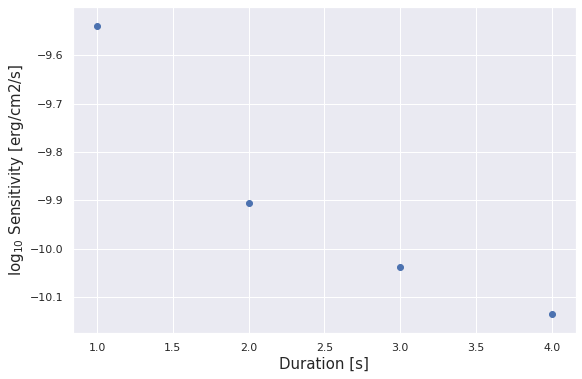

In [36]:
my_grb.plot_results(logy=True, logx=False)